# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading the raw data

In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

# Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = raw_data.dropna(axis = 0)

In [6]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

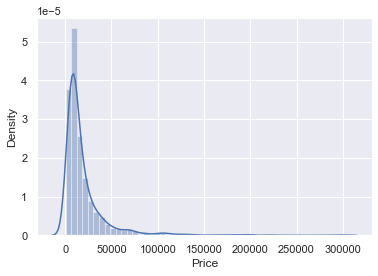

In [7]:
sns.distplot(data_no_mv['Price'])

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

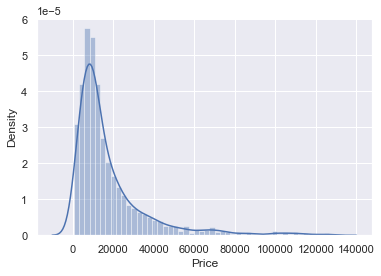

In [9]:
sns.distplot(data_1['Price'])

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

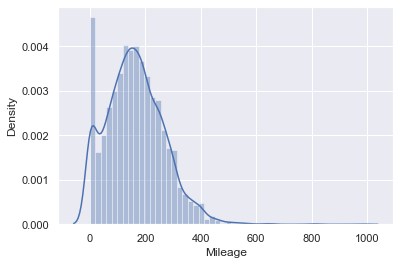

In [10]:
sns.distplot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]


C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

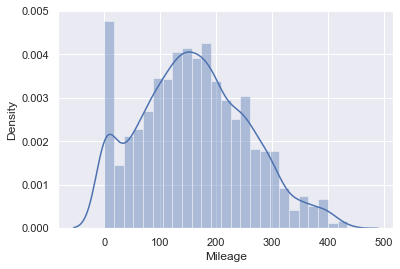

In [12]:
sns.distplot(data_2['Mileage'])

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

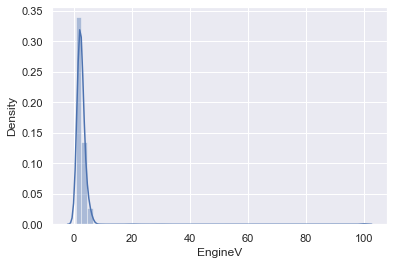

In [13]:
sns.distplot(data_no_mv['EngineV'])

In [14]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

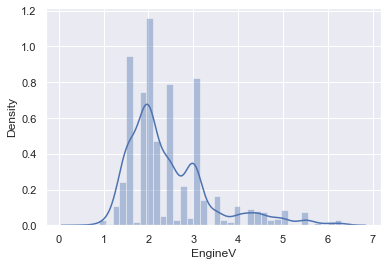

In [15]:
sns.distplot(data_3['EngineV'])

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

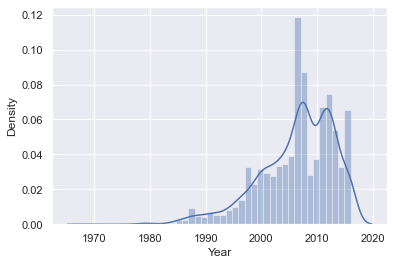

In [16]:
sns.distplot(data_no_mv['Year'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

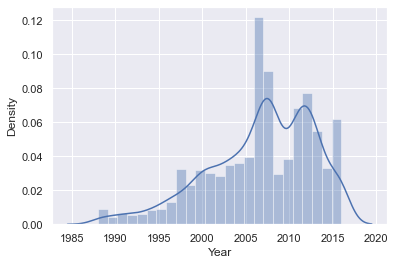

In [18]:
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


Text(0.5, 1.0, 'Mileage and Year')

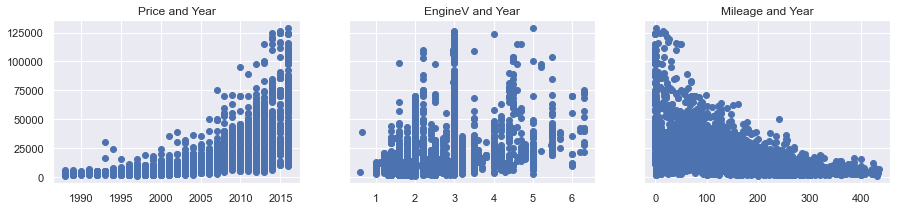

In [20]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Year')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Mileage and Year')

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

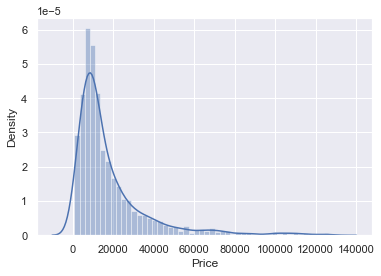

In [21]:
sns.distplot(data_cleaned['Price'])

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


Text(0.5, 1.0, 'Log Price and Mileage')

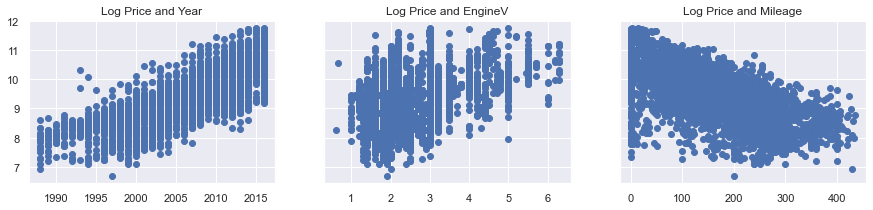

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

In [24]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)


In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [27]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

In [28]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first =True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [30]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [31]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
targets = data_preprocessed['log_price']

In [33]:
inputs = data_preprocessed.drop(['log_price'],axis = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
inputs_scaled = scaler.transform(inputs)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
y_hat = reg.predict(x_train)

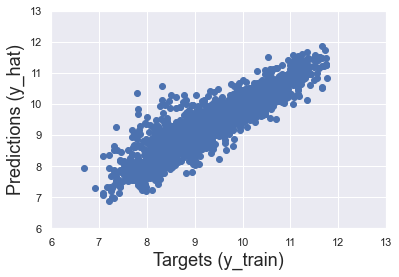

In [39]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_hat)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Uma Sankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

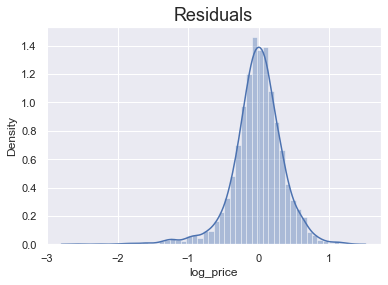

In [40]:
sns.distplot(y_train - y_hat)
plt.title('Residuals',size = 18)

In [41]:
reg.score(x_train,y_train)

0.8256760503552297

In [42]:
r2 = reg.score(x_train,y_train)

In [43]:
x_train.shape

(3093, 307)

In [44]:
n = x_train.shape[0]
p = x_train.shape[1]

In [45]:
adjusted_r2 = 1 - (1 - r2)*(n - 1)/(n - p -1)
adjusted_r2

0.8064597298737416

In [46]:
reg.intercept_

58681878276.656044

In [47]:
reg.coef_

array([-3.60637812e-01,  2.00507310e-02,  1.90342041e+12,  2.05098376e+12,
       -9.79384825e+12,  5.64132096e+12,  9.04505881e+12, -9.65425742e+11,
       -5.57896084e-02, -7.44628906e-03, -6.29882812e-02, -4.51660156e-02,
       -3.90625000e-03, -9.32617188e-02, -2.44140625e-02, -1.21093750e-01,
        3.14941406e-01,  3.21630866e+11, -5.17083368e+11,  5.26123047e-02,
        1.41906738e-02, -1.68457031e-02, -2.89519196e+11,  1.92871094e-02,
        2.12402344e-02, -3.31115723e-03,  3.39965820e-02,  9.27734375e-03,
       -2.04747469e+11,  1.71508789e-02, -1.50146484e-02,  1.75170898e-02,
        4.50134277e-02,  9.81750488e-02, -1.03894014e+12,  2.15911865e-02,
        3.41796875e-02,  4.43115234e-02, -9.56622383e+11,  2.61230469e-02,
        2.73132324e-02, -4.16605443e+12,  2.44140625e-02,  3.08227539e-02,
        1.60644531e-01,  4.70581055e-02,  1.01457137e+13,  6.15234375e-02,
        5.49316406e-02,  9.49707031e-02,  8.88671875e-02,  2.32543945e-02,
       -5.02911112e+12,  

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.606378e-01
1,EngineV,2.005073e-02
2,Brand_BMW,1.903420e+12
3,Brand_Mercedes-Benz,2.050984e+12
4,Brand_Mitsubishi,-9.793848e+12
...,...,...
302,Model_X6,1.567993e-01
303,Model_X6 M,4.772949e-02
304,Model_Yaris,-1.311081e+12
305,Model_Z3,1.098633e-02


In [49]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [50]:
y_hat_test = reg.predict(x_test)

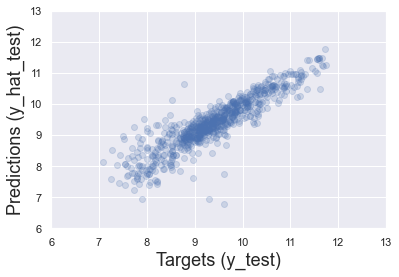

In [51]:
plt.scatter(y_test,y_hat_test,alpha = 0.2)
plt.xlabel('Targets (y_test)',size = 18)
plt.ylabel('Predictions (y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns = ['Predictions'])
df_pf.head()

<ipython-input-52-a77f21cd8f59>:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test),columns = ['Predictions'])


,Predictions
0,1.030888e+04
1,inf
2,4.034059e+03
3,7.551349e+03
4,1.134422e+04


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.030888e+04,NaN
1,inf,7900.0
2,4.034059e+03,NaN
3,7.551349e+03,NaN
4,1.134422e+04,NaN
...,...,...
769,3.730541e+04,6950.0
770,8.649214e+03,NaN
771,1.573836e+04,NaN
772,2.762169e+04,NaN


In [54]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.030888e+04,2300.0
1,inf,2800.0
2,4.034059e+03,2500.0
3,7.551349e+03,6400.0
4,1.134422e+04,9150.0
...,...,...
769,3.730541e+04,29500.0
770,8.649214e+03,9600.0
771,1.573836e+04,18300.0
772,2.762169e+04,68500.0


In [56]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [57]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,1.030888e+04,2300.0,-8.008879e+03,348.212113
1,inf,2800.0,-inf,inf
2,4.034059e+03,2500.0,-1.534059e+03,61.362366
3,7.551349e+03,6400.0,-1.151349e+03,17.989829
4,1.134422e+04,9150.0,-2.194223e+03,23.980582
...,...,...,...,...
769,3.730541e+04,29500.0,-7.805409e+03,26.459014
770,8.649214e+03,9600.0,9.507863e+02,9.904024
771,1.573836e+04,18300.0,2.561637e+03,13.998017
772,2.762169e+04,68500.0,4.087831e+04,59.676369


In [58]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,18165.817106,-inf,inf
std,NaN,19967.858908,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.098880
25%,7.277151e+03,6900.000000,-2.098936e+03,9.251576
50%,1.150039e+04,11600.000000,1.044235e+02,19.889099
75%,2.065741e+04,20500.000000,2.285284e+03,36.955851
max,inf,126000.000000,7.637685e+04,inf


In [59]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%2f'%x)
df_pf.sort_values(by = ['Difference%'])

,Predictions,Target,Residual,Difference%
292,7492.583970,7500.000000,7.416030,0.098880
315,4294.233612,4300.000000,5.766388,0.134102
601,34544.005738,34600.000000,55.994262,0.161833
655,9471.513618,9500.000000,28.486382,0.299857
448,14445.859995,14500.000000,54.140005,0.373379
741,14737.973573,14800.000000,62.026427,0.419097
612,3014.003303,3000.000000,-14.003303,0.466777
212,15615.885968,15700.000000,84.114032,0.535758
171,7107.704612,7150.000000,42.295388,0.591544
620,31192.673971,30990.000000,-202.673971,0.653998


In [60]:
from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)

C:\Users\Uma Sankar\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


(array([1.74600706e+03, 6.34257056e+02, 2.40461121e+01, 6.94801991e+01,
        2.59700585e+01, 1.59475167e+02, 7.23966764e+01, 3.54238508e+01,
        5.70528620e+01, 6.25385506e+00, 4.92611405e+01, 1.14847341e+02,
        6.03106911e+01, 2.25048061e+01, 5.26552424e+00, 5.38757601e+00,
        8.18685934e+02, 2.33843111e+01,            nan, 1.46099451e-02,
        3.10605027e-04, 2.10582041e+00, 3.37953229e+00, 1.76003179e+00,
        5.63092832e+00, 2.69630747e+00, 5.90955440e-01, 1.35042367e+00,
        8.38378056e+00, 8.29217466e-01, 3.06167254e+00, 6.12206958e+00,
        2.00597669e+01, 1.36180290e+01,            nan, 9.09907791e-03,
        1.61778106e-01, 5.83011677e-01, 4.23800635e-14, 2.74316376e+00,
        1.62627989e+00,            nan, 1.42931987e-01, 4.96001508e+00,
        4.36510265e+00, 1.80433253e+00,            nan, 4.82976606e+01,
        1.02877571e+00, 6.90444873e+00, 3.92837846e+00, 3.38463628e+00,
                   nan, 7.14020868e+00, 4.94900274e+00, 4.732064

In [61]:
p_values = f_regression(x_train,y_train)[1]
p_values

C:\Users\Uma Sankar\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


array([6.49475128e-303, 1.84779331e-127, 9.89118757e-007, 1.14657293e-016,
       3.67595093e-007, 1.10396183e-035, 2.70278797e-017, 2.94981234e-009,
       5.55282154e-014, 1.24437077e-002, 2.74224005e-012, 2.45144747e-026,
       1.09348061e-014, 2.19120579e-006, 2.18185920e-002, 2.03453585e-002,
       6.14594532e-160, 1.39139028e-006,             nan, 9.03800589e-001,
       9.85939956e-001, 1.46841098e-001, 6.61066815e-002, 1.84718552e-001,
       1.77071190e-002, 1.00682675e-001, 4.42108624e-001, 2.45293782e-001,
       3.81239533e-003, 3.62569909e-001, 8.02583477e-002, 1.34037459e-002,
       7.77780871e-006, 2.27888250e-004,             nan, 9.24011967e-001,
       6.87552517e-001, 4.45192529e-001, 1.00000000e+000, 9.77727194e-002,
       2.02314203e-001,             nan, 7.05409405e-001, 2.60117406e-002,
       3.67638535e-002, 1.79288206e-001,             nan, 4.44769081e-012,
       3.10525779e-001, 8.64065353e-003, 4.75661364e-002, 6.59025326e-002,
                   nan, 7

In [62]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.012, 0.   , 0.   , 0.   , 0.   , 0.022, 0.02 , 0.   , 0.   ,
         nan, 0.904, 0.986, 0.147, 0.066, 0.185, 0.018, 0.101, 0.442,
       0.245, 0.004, 0.363, 0.08 , 0.013, 0.   , 0.   ,   nan, 0.924,
       0.688, 0.445, 1.   , 0.098, 0.202,   nan, 0.705, 0.026, 0.037,
       0.179,   nan, 0.   , 0.311, 0.009, 0.048, 0.066,   nan, 0.008,
       0.026, 0.492, 0.   , 0.585, 0.508, 0.487, 0.26 , 0.802, 0.513,
       0.   , 1.   , 0.   , 0.007, 0.147, 0.545, 0.705, 0.   , 0.337,
       0.855, 0.519, 0.   , 0.108, 0.   , 0.   , 0.715, 0.003, 0.131,
       0.51 , 0.196, 0.967, 0.827, 0.539, 0.607, 0.976, 0.609, 0.729,
       0.147, 0.055, 0.109, 0.021, 0.344, 0.036, 0.232, 0.016, 0.119,
       0.16 ,   nan, 0.63 , 0.666, 0.096, 0.513, 1.   , 0.807, 0.508,
       0.746,   nan, 0.261, 0.017, 0.079, 0.021, 0.   , 0.032, 0.472,
       0.765, 0.009, 0.001, 1.   , 0.024, 0.008, 0.008, 0.565, 0.949,
       0.702, 0.612,

In [63]:
reg_summary = pd.DataFrame(data = inputs.columns.values,columns = ['Features'])
reg_summary

,Features
0,Mileage
1,EngineV
2,Brand_BMW
3,Brand_Mercedes-Benz
4,Brand_Mitsubishi
5,Brand_Renault
6,Brand_Toyota
7,Brand_Volkswagen
8,Body_hatch
9,Body_other


In [64]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['P-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,P-values
0,Mileage,-0.360638,0.000000
1,EngineV,0.020051,0.000000
2,Brand_BMW,1903420406813.405518,0.000000
3,Brand_Mercedes-Benz,2050983761654.117432,0.000000
4,Brand_Mitsubishi,-9793848247284.955078,0.000000
5,Brand_Renault,5641320958168.374023,0.000000
6,Brand_Toyota,9045058806772.363281,0.000000
7,Brand_Volkswagen,-965425742140.711670,0.000000
8,Body_hatch,-0.055790,0.000000
9,Body_other,-0.007446,0.012000
